In [1]:
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pylab
import scipy as sp
import scipy.stats


from datetime import datetime, date, time, timedelta
from numpy import array, polyfit, poly1d
from pandas import DataFrame, to_datetime
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm,rayleigh
from tkinter import *
from tkinter import filedialog

register_matplotlib_converters()

%matplotlib inline

In [2]:
def get_file():

# Select input file
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = 'C:\QGHL\Wave_data', title = 'Select SECO master file',\
                        filetypes = (('Seco files','*.seco'),('all files','*.*')))
    root.destroy()
    
    print(root.filename)

    return(root.filename)

In [3]:
def addYears(d, years):
#add year(s) with a given date

    try:
#Return same day of the current year        
        return d.replace(year = d.year + years)
    except ValueError:
#If not same day, it will return other, i.e.  February 29 to March 1 etc.        
        return d + (date(d.year + years, 1, 1) - date(d.year, 1, 1))

In [4]:
def Date_range(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [21]:
############################################
#    MAIN PROGRAM
############################################

# Create a DT based on the structure type of the SECO Master File
# Details copied from PV~Wave file Master_structure_types_corrected.pro
pp1 = np.dtype([
    ('P1', 'B'),('P2', 'B'),('P3', 'B'),('P4', 'B'),('P5', 'B'),('P6', 'B'),('P7', 'B'),('P8', 'B')])

rectype = np.dtype([
#    ('Year','i2'),('Month','i2'),('Day', 'i2'),('Hour', 'i2'),('Min', 'i2'), ('Sec','i2'), 
    ('Date_val','i2',(6)), 
    ('Buoy','i2'),
    ('verstr','B',(8,)),
    ('m0','f4'),('m1','f4'), ('m2', 'f4'),('m4', 'f4'),('Tp','f4'),('board', 'f4', (128,)), 
    ('Elapse', 'i2'),('Hm0', 'f4'),('Pktdir', 'f4'),('Avedir', 'f4'),('Pkdir', 'f4'),('Pdens', 'f4'),
    ('Jdir', 'i2', (64,)),('Jpower', 'i2', (64,)),('Jspread', 'i2', (64,)),
    ('Pad', 'B', (64,))])


Start_File = get_file()
date_str = Start_File.split('/')[-1].split('.')[0]
Start_time = datetime.strptime(date_str[3:], "%d%m%Y")

# Get name of input PRIM file
site = Start_File.split('/')[-1].split('}')[0].upper()

##End_File = get_file()
##date_str = End_File.split('/')[-1].split('.')[0]
##End_time = datetime.strptime(date_str[3:], "%d%m%Y")
End_time = addYears(Start_time, 1)

Path = os.path.dirname(Start_File)
File_name = os.path.basename(Start_File)

Front_part = Start_File.split('/')[0]
Extension = Start_File.split('.')[-1]

Days = (End_time-Start_time).days

recs = pd.DataFrame([])

aa = []

for dt in Date_range(Start_time, End_time):
    Input_File = Path+'/'+date_str[0:3]+dt.strftime("%d%m%Y")+'.'+Extension

    error_to_catch = getattr(__builtins__,'FileNotFoundError', IOError)

    try:
# Read data from the RTWS SECO file
        print('Reading data from RTWS SECO file:',Input_File)
        # Open file
        f = open(Input_File)

# Read data from the Binary file into a DF based on the structure in the DT
        data = np.fromfile(f, rectype)
        aa.append(DataFrame.from_records(np.array(data).tolist()))
  
    except error_to_catch:
        print('WARNING... ',Input_File,' NOT Found!')

recs = pd.concat(aa)
# Assign column names to DF
recs.columns = ['Date_val','Buoy','Verstr','m0','m1','m2','m4','Tp','board','Elapse','Hm0',
                'Pktdir','Avedir','Pkdir','Pdens','Jdir','Jpower','Jspread','Pad']

# remove those records with zero dates
recs = recs.loc[recs.Date_val.apply(pd.Series)[0]>0]

# Convert date/time column data into Dates and times
Record_time = pd.DataFrame(recs.Date_val.values.tolist(), \
        columns=['year','month','day','hour','minute','second'])

##Record_time['year'] = Record_time['year'].mask(Record_time['year'] < 1900, Record_time['year'] + 1900)

# Insert Date column at start of DF
recs.index = pd.to_datetime(Record_time[['year','month','day','hour','minute','second']],format='%Y:%m:%d:%H:%M:%S')

print('Program Finished')


G:/SECO/sec01012005.d28
Reading data from RTWS SECO file: G:/SECO/sec01012005.d28
Reading data from RTWS SECO file: G:/SECO/sec02012005.d28
Reading data from RTWS SECO file: G:/SECO/sec03012005.d28
Reading data from RTWS SECO file: G:/SECO/sec04012005.d28
Reading data from RTWS SECO file: G:/SECO/sec05012005.d28
Reading data from RTWS SECO file: G:/SECO/sec06012005.d28
Reading data from RTWS SECO file: G:/SECO/sec07012005.d28
Reading data from RTWS SECO file: G:/SECO/sec08012005.d28
Reading data from RTWS SECO file: G:/SECO/sec09012005.d28
Reading data from RTWS SECO file: G:/SECO/sec10012005.d28
Reading data from RTWS SECO file: G:/SECO/sec11012005.d28
Reading data from RTWS SECO file: G:/SECO/sec12012005.d28
Reading data from RTWS SECO file: G:/SECO/sec13012005.d28
Reading data from RTWS SECO file: G:/SECO/sec14012005.d28
Reading data from RTWS SECO file: G:/SECO/sec15012005.d28
Reading data from RTWS SECO file: G:/SECO/sec16012005.d28
Reading data from RTWS SECO file: G:/SECO/sec170

WARNING...  G:/SECO/sec16062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec17062005.d28
WARNING...  G:/SECO/sec17062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec18062005.d28
WARNING...  G:/SECO/sec18062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec19062005.d28
WARNING...  G:/SECO/sec19062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec20062005.d28
WARNING...  G:/SECO/sec20062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec21062005.d28
WARNING...  G:/SECO/sec21062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec22062005.d28
WARNING...  G:/SECO/sec22062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec23062005.d28
WARNING...  G:/SECO/sec23062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec24062005.d28
WARNING...  G:/SECO/sec24062005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec25062005.d28
WARNING...  G:/SECO/sec25062005.d28  NOT Found

WARNING...  G:/SECO/sec16122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec17122005.d28
WARNING...  G:/SECO/sec17122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec18122005.d28
WARNING...  G:/SECO/sec18122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec19122005.d28
WARNING...  G:/SECO/sec19122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec20122005.d28
WARNING...  G:/SECO/sec20122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec21122005.d28
WARNING...  G:/SECO/sec21122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec22122005.d28
WARNING...  G:/SECO/sec22122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec23122005.d28
WARNING...  G:/SECO/sec23122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec24122005.d28
WARNING...  G:/SECO/sec24122005.d28  NOT Found!
Reading data from RTWS SECO file: G:/SECO/sec25122005.d28
WARNING...  G:/SECO/sec25122005.d28  NOT Found

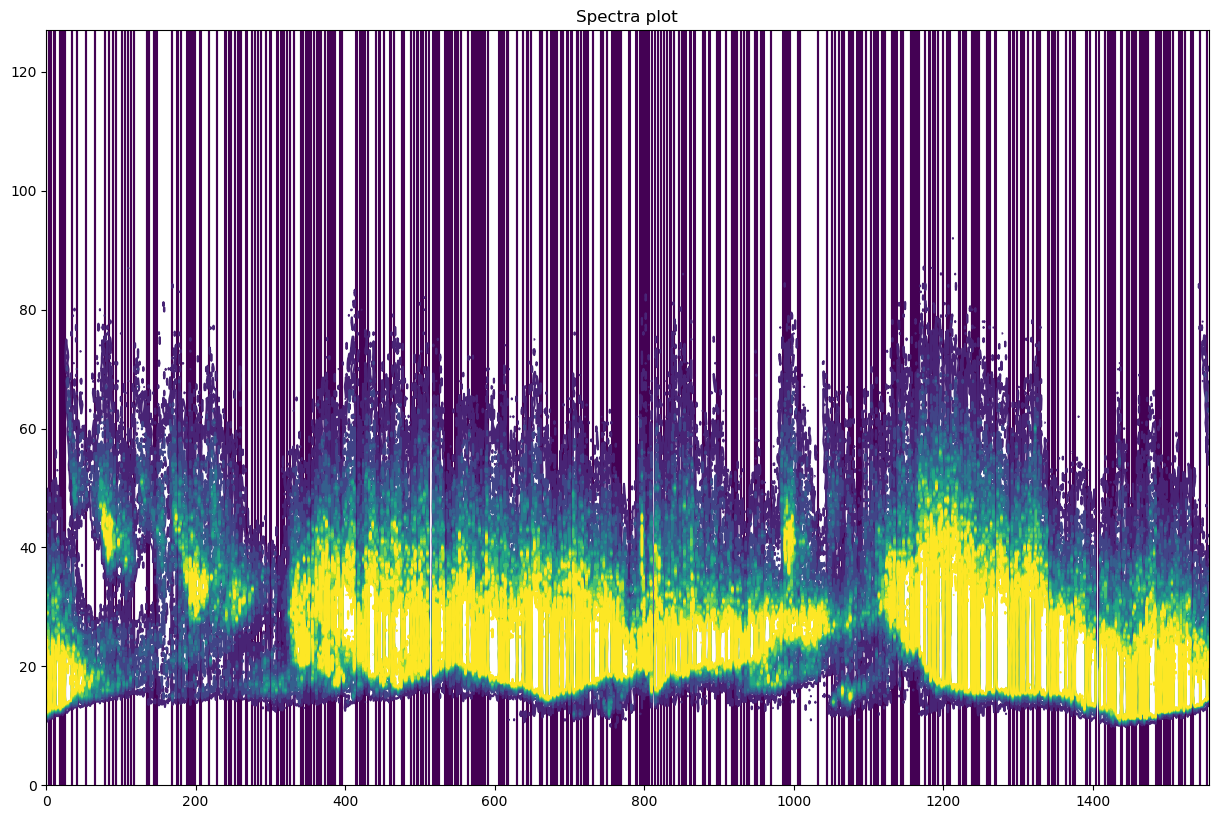

In [7]:
import pylab as pl

X, Y = np.mgrid[0:len(recs), 0:128]

plt.figure(figsize=(15,10),dpi=100)
plt.title("Spectra plot")
plt.contour(X, Y, recs.board.tolist(),levels=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

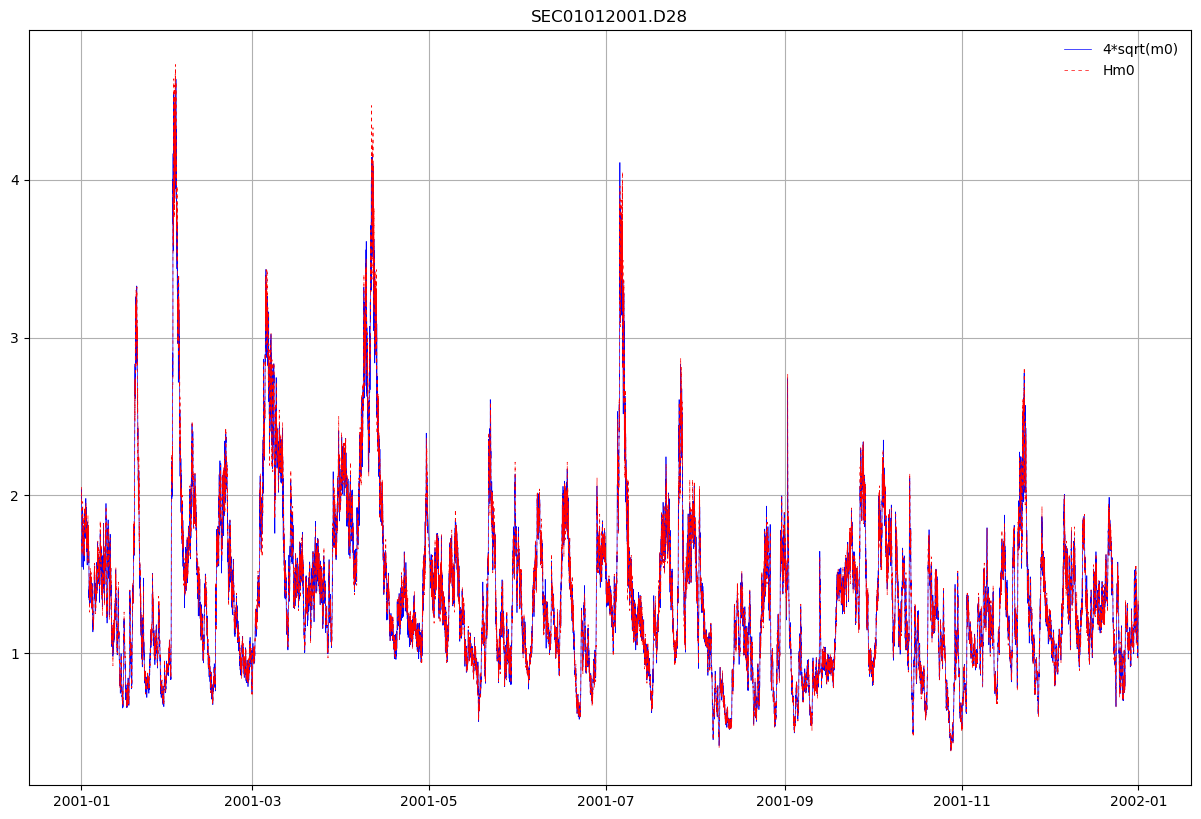

In [51]:
plt.figure(figsize=(15,10),dpi=100)
plt.title(site)

# only plot records where Hsig > 0
recs = recs.loc[recs.m0>0]

plt.grid(True)
plt.plot(recs.index,4*np.sqrt(recs.m0),lw=0.5,c="b")
plt.plot(recs.index,recs.Hm0,lw=0.5,c="r",dashes=[5, 5, 5, 5])

plt.legend(["4*sqrt(m0)", "Hm0"],frameon=False)
#plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,10),dpi=100)
plt.title(site)

# only plot records where Hsig > 0
recs = recs.loc[recs.Hsig>0]

plt.grid(True)
plt.plot(recs.index,recs.Tp,lw=0.5,c="b")
plt.plot(recs.index,recs.Tc,lw=0.5,c="r",dashes=[5, 5, 5, 5])
plt.plot(recs.index,recs.Tz,lw=0.5,c="g")
plt.legend(["Tp", "Tc", "Tz"],frameon=False)
#plt.legend()
plt.show()

C:\Users\Jim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\Users\Jim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


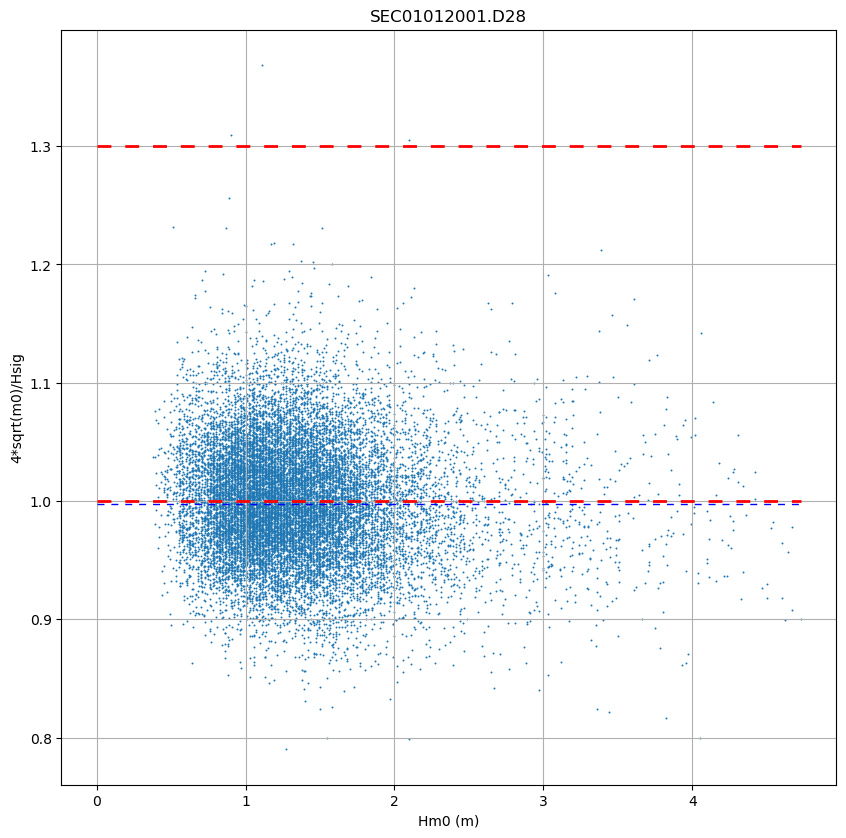

In [6]:
# Do scatter plot of Hm0/Hsig Ratio

# Generate descriptive statistics of Hm0/Hsig Ratio’s distribution
Ratio = 4*np.sqrt(recs.m0)/recs.Hm0
median = Ratio.describe()[5]
plt.figure(figsize=(10,10),dpi=100)
recs = recs.loc[recs.Hm0>0]
plt.scatter(recs.Hm0,4*np.sqrt(recs.m0)/recs.Hm0,lw=0,marker='o',s=2)
plt.plot([0,max(recs.Hm0)],[median,median],lw=1.0,c="b",dashes=[5, 5, 5, 5])
plt.xlabel("Hm0 (m)")
plt.ylabel("4*sqrt(m0)/Hsig")
plt.plot([0,max(recs.Hm0)],[1.3,1.3],lw=2.0,c="r",dashes=[5, 5, 5, 5])
plt.plot([0,max(recs.Hm0)],[1.0,1.0],lw=2.0,c="r",dashes=[5, 5, 5, 5])

plt.grid(True)
#plt.xlim(xmin=0,xmax=max(recs.Hm0))
#plt.ylim(ymin=0.7,ymax=1.5)

from numpy.polynomial import Polynomial

#p = Polynomial.fit(recs.Hm0,4*np.sqrt(recs.m0)/recs.Hm0, 1)
#plt.plot(*p.linspace(),lw=1.0,c="r",dashes=[5, 5, 5, 5])

plt.title(site)
plt.show()

In [ ]:
# Do scatter plot of Hmax/Hsig Ratio

# Generate descriptive statistics of Hm0/Hsig Ratio’s distribution
Ratio = recs.Hmax/recs.Hsig
median = Ratio.describe()[5]
plt.figure(figsize=(10,10),dpi=100)
recs = recs.loc[recs.Hsig>0]
plt.grid(True)
plt.scatter(recs.Hsig,recs.Hmax/recs.Hsig,lw=0,marker='o',s=2)
plt.plot([0,max(recs.Hsig)],[median,median],lw=1.0,c="b",dashes=[5, 5, 5, 5])
plt.xlabel("Hsig (m)")
plt.ylabel("Hmax/Hsig")
plt.plot([0,max(recs.Hsig)],[2.5,2.5],lw=1.0,c="r",dashes=[5, 5, 5, 5])
plt.plot([0,max(recs.Hsig)],[1.4,1.4],lw=1.0,c="r",dashes=[5, 5, 5, 5])

plt.xlim(xmin=0,xmax=max(recs.Hsig))

plt.title(site)
plt.show()

In [ ]:
plt.figure(figsize=(15,10),dpi=100)
plt.title(site)

# only plot records where Hsig > 0
recs = recs.loc[recs.Hsig>0]

plt.grid(True)
plt.plot(recs.Tp,lw=0.5,c='g')
suspect_Tp = recs[~(recs.Tp).between(1,16,inclusive=False)]
plt.plot(suspect_Tp.Tp,lw=0,marker='o',ms=3.5,c='r')
plt.xlabel("Date")
plt.ylabel("Tp (s)")
plt.plot([recs.index[0],recs.index[-1]],[16.0,16.0],lw=1.0,c="r",dashes=[5, 5, 5, 5])

plt.ylabel("Tp (s)")

plt.legend(["Tp","Suspect Tp's"],frameon=False)
plt.show()


In [ ]:
# Do scatter plot of T02/Tz Ratio

# Generate descriptive statistics of T02/Tz Ratio’s distribution
Ratio = recs.T02/recs.Tz
median = Ratio.describe()[5]
plt.figure(figsize=(10,10),dpi=100)
recs = recs.loc[recs.Hsig>0]
plt.grid(True)
plt.scatter(recs.Tz,recs.T02/recs.Tz,lw=0,marker='o',s=2)
plt.plot([0,max(recs.Tz)],[median,median],lw=1.0,c="b",dashes=[5, 5, 5, 5])
plt.xlabel("Tz (s)")
plt.ylabel("T02/Tz")
plt.plot([0,max(recs.Tz)],[1.0,1.0],lw=1.0,c="r",dashes=[5, 5, 5, 5])
plt.plot([0,max(recs.Tz)],[0.5,0.5],lw=1.0,c="r",dashes=[5, 5, 5, 5])

plt.xlim(xmin=0,xmax=max(recs.Tz))
plt.ylim(ymin=0.4,ymax=1.2)

plt.title(site)
plt.show()

In [ ]:
# Do scatter plot of Tc/Tz Ratio

# Generate descriptive statistics of Hm0/Hsig Ratio’s distribution
Ratio = recs.Tc/recs.Tz
median = Ratio.describe()[5]
plt.figure(figsize=(10,10),dpi=100)
recs = recs.loc[recs.Hsig>0]
plt.grid(True)
plt.scatter(recs.Tz,recs.Tc/recs.Tz,lw=0,marker='o',s=2)
plt.plot([0,max(recs.Tz)],[median,median],lw=1.0,c="b",dashes=[5, 5, 5, 5])
plt.xlabel("Tz (s)")
plt.ylabel("Tc/Tz")
plt.plot([0,max(recs.Tz)],[1.0,1.0],lw=1.0,c="r",dashes=[5, 5, 5, 5])
plt.plot([0,max(recs.Tz)],[0.5,0.5],lw=1.0,c="r",dashes=[5, 5, 5, 5])

plt.xlim(xmin=0,xmax=max(recs.Tz))
plt.ylim(ymin=0.4,ymax=1.2)

plt.title(site)
plt.show()

In [23]:
# Calculate Version of RTWS as stored in Procid
for i in range(1,len(recs),1):
    print(''.join(chr(j) for j in recs.iloc[i].Verstr))

4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4

4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4.02    
4

In [22]:
len(recs)

1556